# Testing Notebook

### Import libraries

In [1]:
import sys
import os

# Manually specify the path to the 'src' directory
src_path = os.path.abspath(os.path.join(os.getcwd(), '../src'))

# Add the specified path to the system path
sys.path.append(src_path)

# Third-party libraries
import networkx as nx
from qiskit import transpile
from qiskit_ibm_runtime.fake_provider import FakeGuadalupeV2, FakeBrooklynV2
import mapomatic as mm

# Local application/library imports
import circuit_gen as circuitGen
import max_clique as maxClique
import qubit_mapping as qMap

### Parameters Configuration

In [2]:
num_modules       = 4
module_max_qubits = 4
module_max_gates  = 6
buffer_distance   = 1

### Random Circuit Generation and Mapping Computation

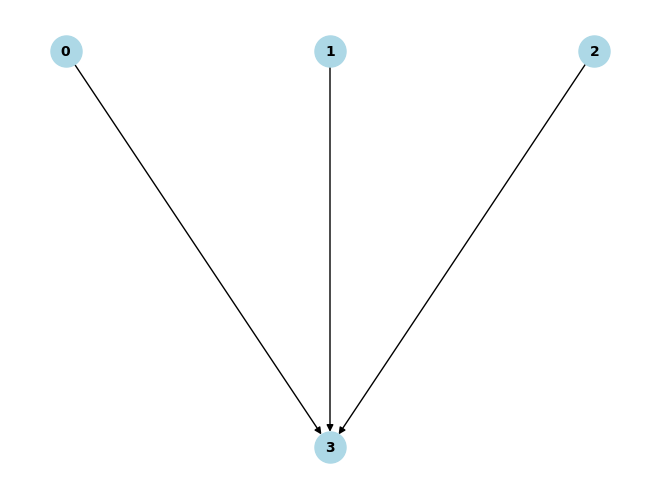

In [3]:
# Generate random circuit
circuit = circuitGen.RandomCircuit(num_modules, module_max_qubits, module_max_gates)
circuit.gen_random_circuit()

# Ploy dependency graph
circuit.draw_dependency_graph()

In [4]:
# Generate the Quantum Circuit Mapping
q_map = qMap.QubitMapping(circuit, backend=FakeGuadalupeV2(), buffer_distance=buffer_distance)


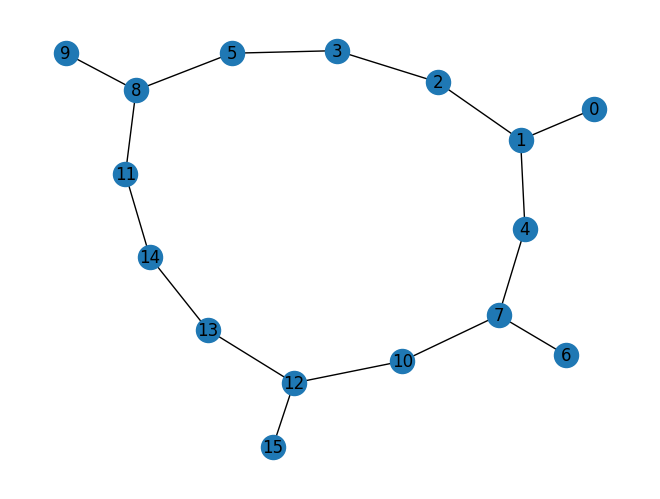

In [5]:
def generate_layouts(module, backend):
    """ Searches for, optimizes and evaluates quantum circuit layouts for a specified backend. """    
    trans_qc = transpile(module, backend, optimization_level=3)
    small_qc = mm.deflate_circuit(trans_qc)
    layouts = mm.matching_layouts(small_qc, backend)
    scores = mm.evaluate_layouts(small_qc, layouts, backend)
    return scores

backend   = q_map.backend
couplings = backend.coupling_map.get_edges()
qc_graph  = nx.from_edgelist(couplings)

nx.draw(qc_graph, with_labels=True)

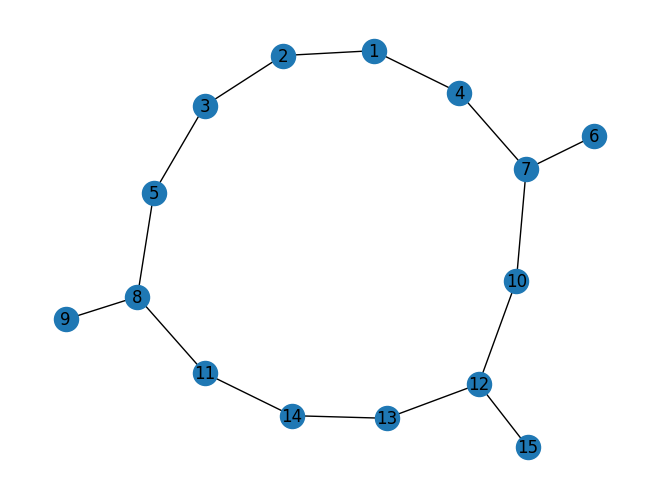

In [13]:
coupling_map_new = q_map.find_coupling_map_up_to_distance_x(backend, 12, 8, 4)
couplings = coupling_map_new.get_edges()
new_qc_graph  = nx.from_edgelist(couplings)

nx.draw(new_qc_graph, with_labels=True)